In [1]:
!pip install gymnasium stable-baselines3 tensorflow matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.3 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from stable_baselines3 import DQN, A2C


In [3]:
env = gym.make("Taxi-v3")


In [4]:
# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 1000  # Number of episodes
max_steps = 100  # Max steps per episode


In [5]:
def epsilon_greedy_policy(Q, state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit


In [6]:
def q_learning():
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0

        for _ in range(max_steps):
            action = epsilon_greedy_policy(Q, state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
            state = next_state

            if done:
                break

        rewards.append(total_reward)

    return rewards


In [7]:
def sarsa():
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon)
        total_reward = 0

        for _ in range(max_steps):
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            state = next_state
            action = next_action

            if done:
                break

        rewards.append(total_reward)

    return rewards


In [14]:
def dqn():
    model = DQN('MlpPolicy', env, verbose=0)
    model.learn(total_timesteps=10000)
    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0

        for _ in range(max_steps):
            # Ensure action is an integer (scalar), not a NumPy array
            action, _ = model.predict(state, deterministic=True)
            action = int(action)  # Convert to scalar integer
            state, reward, done, _, _ = env.step(action)
            total_reward += reward

            if done:
                break

        rewards.append(total_reward)

    return rewards


In [16]:
def actor_critic():
    model = A2C('MlpPolicy', env, verbose=0)
    model.learn(total_timesteps=10000)
    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0

        for _ in range(max_steps):
            # Ensure action is an integer (scalar)
            action, _ = model.predict(state, deterministic=True)
            action = int(action)  # Convert to scalar integer
            state, reward, done, _, _ = env.step(action)
            total_reward += reward

            if done:
                break

        rewards.append(total_reward)

    return rewards


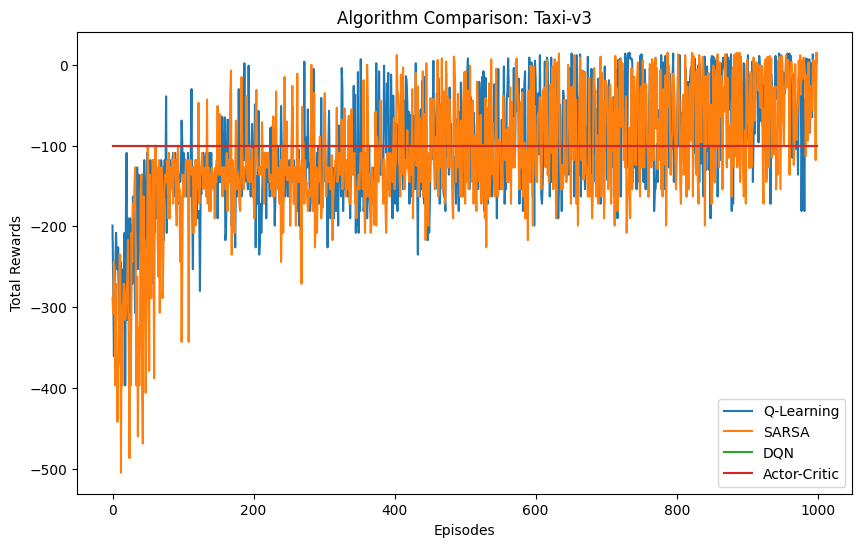

In [17]:
# Collect rewards from each algorithm
q_learning_rewards = q_learning()
sarsa_rewards = sarsa()
dqn_rewards = dqn()
actor_critic_rewards = actor_critic()

# Plot the cumulative rewards for each algorithm
plt.figure(figsize=(10, 6))
plt.plot(q_learning_rewards, label='Q-Learning')
plt.plot(sarsa_rewards, label='SARSA')
plt.plot(dqn_rewards, label='DQN')
plt.plot(actor_critic_rewards, label='Actor-Critic')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Algorithm Comparison: Taxi-v3')
plt.legend()
plt.show()
